# Placement Prediction

**Columns**:
1. Sl_no – serial number
2. Gender – gender of candidate
3. Ssc_p – Secondary education percentage(10th)
4. Ssc_b – Board of SSC (central/others)
5. Hsc_p – Higher secondary education percentage(12th)
6. Hsc_b - Board of HSC (central/others)
7. Hsc_s – Specialisation in HSC (Arts, Commerce, Science)
8. Degree_p – Degree percentage.
9. Degree_t – Degree type (Commerce & Management, Science & Technology, Others)
10. Workex – Work experience
11. Etest_p – Employee test percentage (Conducted by college)
12. Specialisation – Post Graduation MBA specialisation (Mkt & Fin, Mkt & Hr)
13. Mba_p – MBA percentage
14. Status – Status of placement (Placed/Not placed)
15. Salary – Salary offered by company to candidate


**To Find out**:

1. Which factor influenced in candidate getting placed?
2. Which degree is in demand by corporate?
3. Create a classification model to predict who will be placed and who will not.
4. Can you predict the salary? Create a model for it.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
placement_data = pd.read_csv("Placement_Data.csv")
placement_data.drop("sl_no",axis = 1,inplace = True)

In [3]:
placement_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
placement_data[placement_data["status"]=="Placed"][:10]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
10,M,58.00,Central,61.00,Central,Commerce,60.00,Comm&Mgmt,Yes,62.00,Mkt&HR,60.85,Placed,260000.0
11,M,69.60,Central,68.40,Central,Commerce,78.30,Comm&Mgmt,Yes,60.00,Mkt&Fin,63.70,Placed,250000.0
13,F,77.00,Central,87.00,Central,Commerce,59.00,Comm&Mgmt,No,68.00,Mkt&Fin,68.63,Placed,218000.0
15,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0


In [5]:
placement_data[placement_data["status"]=="Not Placed"][:10]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.00,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.00,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.00,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.00,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.00,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
14,M,62.00,Central,47.0,Central,Commerce,50.00,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,NaN
17,F,55.00,Central,67.0,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,NaN
18,F,63.00,Central,66.0,Central,Commerce,64.00,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,NaN
25,F,52.58,Others,54.6,Central,Commerce,50.20,Comm&Mgmt,Yes,76.00,Mkt&Fin,65.33,Not Placed,NaN
29,M,62.00,Central,67.0,Central,Commerce,58.00,Comm&Mgmt,No,77.00,Mkt&Fin,51.29,Not Placed,NaN


In [6]:
df = placement_data.copy()

In [7]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
df.shape

(215, 14)

In [9]:
df.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [10]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [11]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [12]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
# Checking the salary of those who are not placed
df["salary"][df["status"]=="Not Placed"]

3     NaN
5     NaN
6     NaN
9     NaN
12    NaN
       ..
198   NaN
201   NaN
206   NaN
208   NaN
214   NaN
Name: salary, Length: 67, dtype: float64

In [14]:
len(df["salary"][df["status"]=="Not Placed"])

67

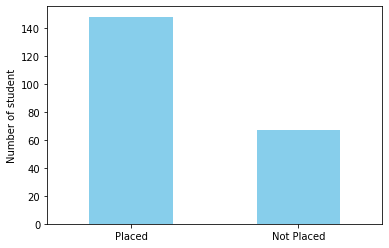

In [15]:
df["status"].value_counts().plot(kind = "bar",color=["skyblue"])
plt.xticks(rotation = 0)
plt.ylabel("Number of student");

In [16]:
# To Know how many boys and girls get placed
pd.crosstab(df["status"],df["gender"])

gender,F,M
status,,
Not Placed,28,39
Placed,48,100


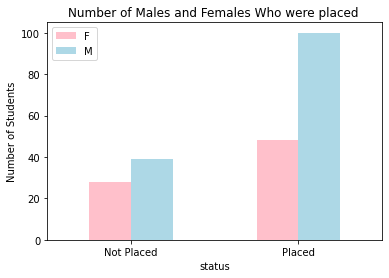

In [17]:
# Getting the visualization
pd.crosstab(df["status"],df["gender"]).plot(kind = "bar",
                                          color= ["pink","lightblue"])
plt.title("Number of Males and Females Who were placed ")
plt.legend()
plt.xticks(rotation=0)
plt.ylabel("Number of Students")
plt.show()

In [18]:
df["degree_t"].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

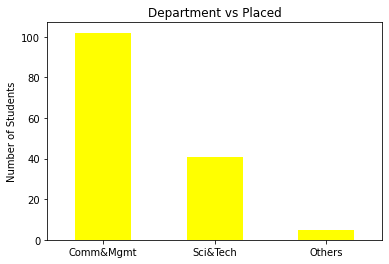

In [19]:
# Plotting the placed students of various degree holders
df["degree_t"][df["status"]=="Placed"].value_counts().plot(kind = "bar",
                                                           color ="yellow")
plt.title("Department vs Placed")
plt.ylabel("Number of Students")
plt.xticks(rotation= 0)
plt.show()

In [20]:
df.columns


Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

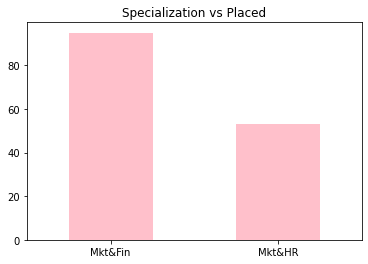

In [21]:
df["specialisation"][df.status =="Placed"].value_counts().plot(kind = "bar",color = ["pink"])
plt.title("Specialization vs Placed")
plt.xticks(rotation = 0);

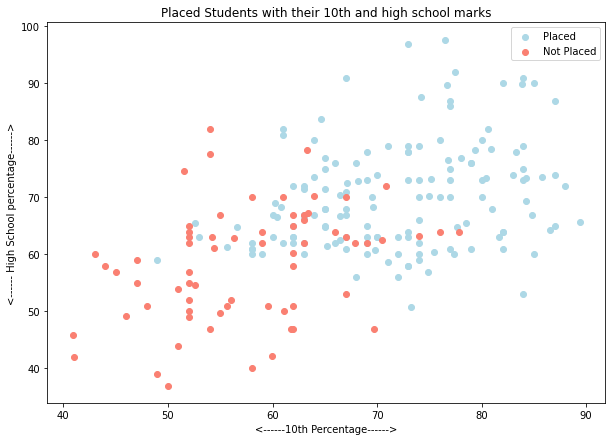

In [22]:
# Plotting the students placed status with their SSC percent and HSC percent
plt.figure(figsize = (10,7))
# Plotting the guys who were placed
plt.scatter(df["ssc_p"][df["status"]=="Placed"],
           df["hsc_p"][df["status"]=="Placed"],
           color = ["lightblue"])


# Plotting the huys who were not placed
plt.scatter(df["ssc_p"][df["status"]=="Not Placed"],
           df["hsc_p"][df["status"]=="Not Placed"],
           color = ["salmon"])

# Adding some useful info
plt.title("Placed Students with their 10th and high school marks")
plt.xlabel("<------10th Percentage------>")
plt.ylabel("<------ High School percentage------>")

plt.legend(["Placed","Not Placed"]);

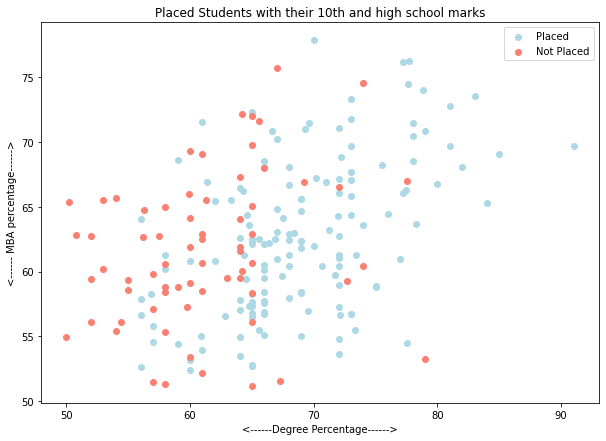

In [23]:
# Plotting the students placed status with their Degree percent and MBA percent
plt.figure(figsize = (10,7))
# Plotting the guys who were placed
plt.scatter(df["degree_p"][df["status"]=="Placed"],
           df["mba_p"][df["status"]=="Placed"],
           color = ["lightblue"])


# Plotting the huys who were not placed
plt.scatter(df["degree_p"][df["status"]=="Not Placed"],
           df["mba_p"][df["status"]=="Not Placed"],
           color = ["salmon"])

# Adding some useful info
plt.title("Placed Students with their 10th and high school marks")
plt.xlabel("<------Degree Percentage------>")
plt.ylabel("<------ MBA percentage------>")

plt.legend(["Placed","Not Placed"]);

In [24]:
# Students with work experience who got placed and not placed
pd.crosstab(df["status"],df["workex"])

workex,No,Yes
status,,
Not Placed,57,10
Placed,84,64


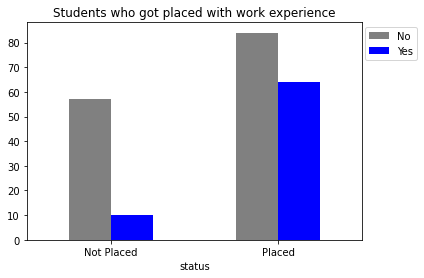

In [25]:
# Visualizing it
pd.crosstab(df["status"],df["workex"]).plot(kind = "bar",color = ["Grey","Blue"])
plt.title("Students who got placed with work experience")
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1.18,1));

In [26]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [27]:
df[df["status"]==0][:10]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


In [28]:
# Degree in Demand by the corporate
df["degree_t"][df.status=="Placed"].value_counts()

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64

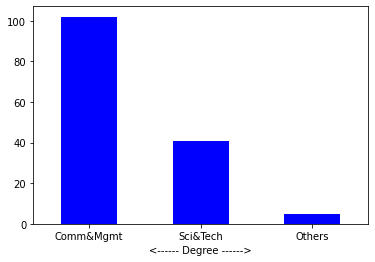

In [29]:
# Plotting 
df["degree_t"][df.status=="Placed"].value_counts().plot(kind = "bar",color = "Blue")
plt.xlabel("<------ Degree ------>")
plt.xticks(rotation = 0);

From the above we can deduce that Comm&Mgmt is being preferred by the corporate

## Data Preprocessing

In [30]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [31]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Filling Null Values

In [32]:
# Filling in the Null values with their median
df["salary"].fillna(value = 0,inplace = True)

In [33]:
# Checking whether their are other null values remaining
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Categorical encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

# Instantiate it
encode = LabelEncoder()

In [35]:
mapping_dict = {}
for i in list(df.columns):
    if df[i].dtype == object:
        df[i] = encode.fit_transform(df[i])
        le_name_mapping = dict(zip(encode.classes_,
                               encode.transform(encode.classes_)))
        mapping_dict[i] = le_name_mapping

In [36]:
mapping_dict

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [37]:
# Checking
df.dtypes

gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
hsc_s               int32
degree_p          float64
degree_t            int32
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
status              int32
salary            float64
dtype: object

In [38]:
df.shape

(215, 14)

In [39]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [40]:
# Splitting into X and y
from sklearn.model_selection import train_test_split

# Splitting into X and y
X_placement = df.drop(["status","salary"],axis = 1)
y_placement = df["status"]


# Setting up the random seed
np.random.seed(69)

Xp_train , Xp_test , yp_train ,yp_test = train_test_split(X_placement,y_placement,test_size = 0.2)



In [41]:
X_placement.shape

(215, 12)

In [42]:
len(X_placement),len(y_placement)

(215, 215)

In [43]:
len(Xp_train),len(Xp_test),len(yp_train),len(yp_test)

(172, 43, 172, 43)

## Modelling

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
Xp_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
102,0,77.00,1,61.00,1,1,68.00,0,1,57.50,0,61.31
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28
130,1,62.00,0,65.00,1,1,60.00,0,0,84.00,0,64.15
135,0,72.00,0,56.00,1,2,69.00,0,0,55.60,1,65.63
189,0,54.00,0,77.60,1,1,69.20,0,0,95.65,0,66.94
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,85.00,1,90.00,1,1,82.00,0,0,92.00,0,68.03
107,1,82.00,1,90.00,1,1,83.00,0,0,80.00,1,73.52
201,1,54.20,0,63.00,1,2,58.00,0,0,79.00,1,58.44
203,1,55.68,1,61.33,1,1,56.87,0,0,66.00,1,58.30


In [46]:
# Instantiate the model
clf = RandomForestClassifier()

# Fit the model
clf.fit(Xp_train,yp_train)

RandomForestClassifier()

In [47]:
clf.score(Xp_test,yp_test)

0.9534883720930233

In [48]:
Xp_test[:6]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
185,0,88.0,0,72.0,0,2,78.00,1,0,82.0,1,71.43
162,1,74.2,0,87.6,1,1,77.25,0,1,75.2,0,66.06
191,1,67.0,1,61.0,0,2,72.00,0,0,72.0,0,61.01
101,1,63.0,0,72.0,0,1,68.00,0,0,78.0,1,60.44
36,1,51.0,0,44.0,0,1,57.00,0,0,64.0,0,51.45
31,0,67.0,0,53.0,0,2,65.00,2,0,64.0,1,58.32


In [49]:
# Making predictions
yp_preds = clf.predict(Xp_test)
yp_preds[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [50]:
len(yp_preds)

43

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(yp_test,yp_preds)

array([[ 8,  1],
       [ 1, 33]], dtype=int64)

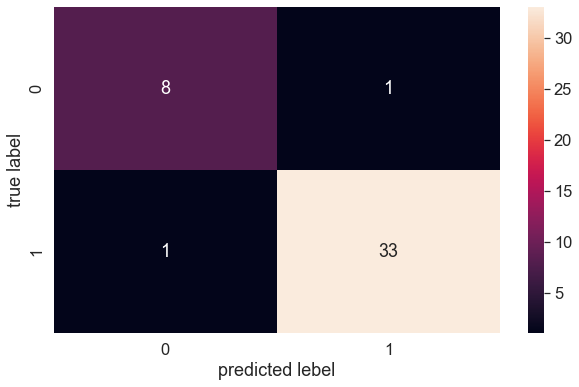

In [53]:
# Plot the confusion matrix 
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test , y_preds):
    """
    This fucntion plot the confusion matrix using seaborn's heatmap().
    """
    fig , ax= plt.subplots(figsize= (10,6))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=True)
    plt.xlabel("predicted lebel")
    plt.ylabel("true label")
    
plot_conf_mat(yp_test,yp_preds)

## Evalaution

In [54]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report
accuracy = accuracy_score(yp_test,yp_preds)
precision = precision_score(yp_test,yp_preds)
f1 = f1_score(yp_test,yp_preds)
recall = recall_score(yp_test,yp_preds)

In [55]:
accuracy,precision,f1,recall

(0.9534883720930233,
 0.9705882352941176,
 0.9705882352941176,
 0.9705882352941176)

In [56]:
print(classification_report(yp_test,yp_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.97      0.97      0.97        34

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



In [57]:
eval_dict = {"Accuracy":accuracy,
            "Precision":precision,
            "F1":f1,
            "Recall":recall}
eval_dict

{'Accuracy': 0.9534883720930233,
 'Precision': 0.9705882352941176,
 'F1': 0.9705882352941176,
 'Recall': 0.9705882352941176}

In [58]:
# Making a dataframe of the evaluation metric
eval_df = pd.DataFrame(eval_dict,
                      index = ["PERFORMANC"])

In [59]:
eval_df

,Accuracy,Precision,F1,Recall
PERFORMANC,0.953488,0.970588,0.970588,0.970588


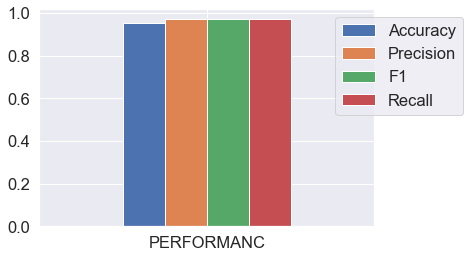

In [60]:
eval_df.plot(kind = "bar")
plt.legend(bbox_to_anchor = (1.29,1))
plt.xticks(rotation = 0);

## Feature Importance

In [61]:
clf.feature_importances_

array([0.02213224, 0.29692263, 0.02344376, 0.16857823, 0.01423369,
       0.01794037, 0.17434686, 0.01818765, 0.0427004 , 0.08024642,
       0.02404074, 0.11722701])

In [62]:
# Making a dataframe of the Feature Importances
feature_df = pd.DataFrame({"Values":clf.feature_importances_},
                         index = Xp_train.columns)

In [63]:
feature_df.sort_values("Values",ascending = True,inplace = True)

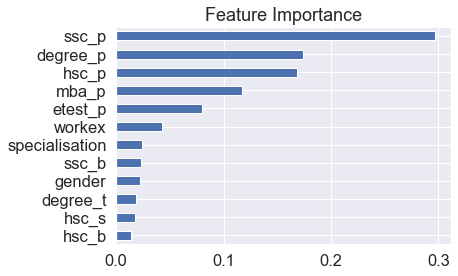

In [64]:
feature_df.plot(kind = "barh",title = "Feature Importance",legend = False);


In [65]:
# Save the model
import pickle
# pickle.dump(clf,open("Placement_predictio.pkl",'wb'))

In [66]:
# Load the model and test
loaded_model = pickle.load(open("Placement_predictio.pkl","rb"))

In [67]:
loaded_model.score(Xp_test,yp_test)

0.9534883720930233

In [68]:
a=[1,2]

In [69]:
np.reshape(a,(1,2))

array([[1, 2]])

In [70]:
print(int(loaded_model.predict([[1,51.,0,44,0,1,57.,0,0,64.,0,51.32]])))

0


## Modelling for Predicting the salary

### Making up the dataset for the salary prediction

In [71]:
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [72]:
X = df.drop("salary",axis = 1)
y = df["salary"]

In [73]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [74]:
# Splitting into train and test datasets
# Setting up the random seed
np.random.seed(42)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)
len(X_train),len(y_train),len(X_test),len(y_test)

(172, 172, 43, 43)

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regressor
model = RandomForestRegressor()

In [76]:
# Fit the model
model.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
model.score(X_test,y_test)

0.7023193982072222

In [78]:
# Making predictions
y_preds = model.predict(X_test)
y_preds[:10]

array([277050., 259040., 307730., 277020., 295750.,      0.,      0.,
       279030., 280180., 269550.])

### Evaluating the model

In [79]:
# Importing evaluation metrics to evaluate the regresson model
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

In [80]:
# Building a function to evaluate the root mean squared log error
def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predicted and label
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))



In [81]:
#Creating a dictionary of the evaluation metrics
scores = {"MAE":mean_squared_log_error(y_test,y_preds),
          "RSMLE":rmsle(y_test,y_preds),
          "R^2":r2_score(y_test,y_preds)
         }

In [82]:
scores

{'MAE': 0.050423628337018515,
 'RSMLE': 0.2245520615292109,
 'R^2': 0.7023193982072222}

### Feature Importance

In [83]:
model.feature_importances_

array([0.00329442, 0.06646063, 0.00214394, 0.05406741, 0.00122408,
       0.00570723, 0.01608338, 0.00522068, 0.00494114, 0.04107328,
       0.00108706, 0.03017805, 0.76851871])

In [84]:
# Plotting the Features Importance
feature_reg_df = pd.DataFrame({"Values":model.feature_importances_},
                         index = X_train.columns)

In [85]:
feature_reg_df.sort_values("Values",inplace = True)

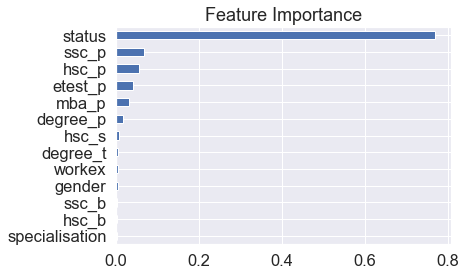

In [86]:
feature_reg_df.plot(kind = "barh",title = "Feature Importance",legend = False);


In [87]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
93,1,52.0,0,62.0,0,1,54.0,0,0,72.00,1,55.41,0
84,1,70.0,0,63.0,1,2,70.0,2,1,55.00,0,62.00,1
95,1,73.0,0,78.0,1,1,65.0,0,1,95.46,0,62.16,1
137,1,67.0,1,63.0,0,1,72.0,0,0,56.00,1,60.41,1
210,1,80.6,1,82.0,1,1,77.6,0,0,91.00,0,74.49,1


In [88]:
# Saving the model
# pickle.dump(model,open("Salary_prediction.pkl",'wb'))

In [89]:
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81,1
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77,1
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90,1
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66,1


In [90]:
# Load the model and evalaute
loaded_model = pickle.load(open("C:/Users/Hp/Desktop/ml-project/Placement_Flask_App/Salary_prediction.pkl",'rb'))
loaded_model.score(X_test,y_test)

0.7023193982072222